# **Uber Data Analysis**

#### **Introduction**

##### This analysis can reveal interesting patterns about how an Uber user behaved in 2016. It might show cultural or regional differences in trip purposes or typical travel distances.

---

#### **Dataset Description**
##### The dataset contains details of personal Uber drives for the year 2016. It includes the following columns:

- **START_DATE**: The date when the trip started.
- **END_DATE**: The date when the trip ended.
- **START**: The starting location of the trip.
- **END**: The ending location of the trip.
- **MILES**: The distance covered in miles during the trip.
- **CATEGORY**: This icludes Business, Personal.
- **PURPOSE**: The purpose of the drive, which could be categorized as Meals, Errands, Meetings, Customer Support, etc.

##### The dataset covers three geographic areas, including the USA, Sri Lanka, and Pakistan. 

##### It contains a total of 1,115 drives and 12,204 miles.


---

#### **Import Libraries**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

----

#### **Load Data**

In [2]:
#Load Data
df = pd.read_csv('/kaggle/input/uberdrives/My Uber Drives - 2016.csv')

---

#### **View Data**

In [3]:
# Dataset length - Number of rows and columns
#Dataset contains 1,115 rows and 7 columns
print(df.shape)

(1155, 7)


In [4]:
#Descriptive Statistics
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [5]:
# Descriptive statistics (for object)
# Highest number of trips took place in Cary. These were business meeting trips
df.describe(include=['object']).T

,count,unique,top,freq
START_DATE,1155,1154,6/28/2016 23:34,2
END_DATE,1155,1154,6/28/2016 23:59,2
CATEGORY,1155,2,Business,1078
START,1155,177,Cary,201
STOP,1155,188,Cary,203
PURPOSE,653,10,Meeting,187


In [6]:
# Get Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
#Retrieve Unique Values in the Column
df.PURPOSE.unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [8]:
#Retrieve Unique Values in the Column
df.CATEGORY.unique()

array(['Business', 'Personal'], dtype=object)

In [9]:
#Check Missing Values 
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [10]:
# Top 5 Rows
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
#Bottom 5 Rows
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


---

#### **Data Cleaning**

In [12]:
#make string as datetime to identify individual easily
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format="%m/%d/%Y %H:%M")
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format="%m/%d/%Y %H:%M")

df['HOUR'] =  [x.hour for x in df['START_DATE']]
df['DAY'] =  [x.day for x in df['START_DATE']]
df['MONTH'] =  [x.month for x in df['START_DATE']]
df['WEEKDAY'] =  [calendar.day_name[x.dayofweek] for x in df['START_DATE']]
df['DAY_OF_WEEK'] =  [x.dayofweek for x in df['START_DATE']]

In [13]:
# Dictionary mapping numerical months to their corresponding names
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Create a new column 'MONTHS' by mapping values from 'MONTH' column
df['MONTHS'] = df['MONTH'].map(month_mapping)

In [14]:
# Check Top 5 Rows
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,MONTHS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,1,Saturday,5,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,January


In [15]:
# Check Duplicates
df.duplicated().sum()

1

In [16]:
#Drop Duplicates
df.drop_duplicates()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,MONTHS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,1,Saturday,5,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5,December


In [17]:
# Correct values by replacing with the correct character
df['START'] = df['START'].replace('Karacha', 'Karachi')
df['STOP'] = df['STOP'].replace('Kar?chi', 'Karachi')
df['START'] = df['START'].replace('Kar?chi', 'Karachi')

---

#### **Data Analysis**

In [18]:
# Value Counts in Category Column
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [19]:
# Value Counts in Purpose Column
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

---

#### **Visualize Trip Category and Purpose**

##### **Category**
-   This clarifies that the most frequent trips were business-related.

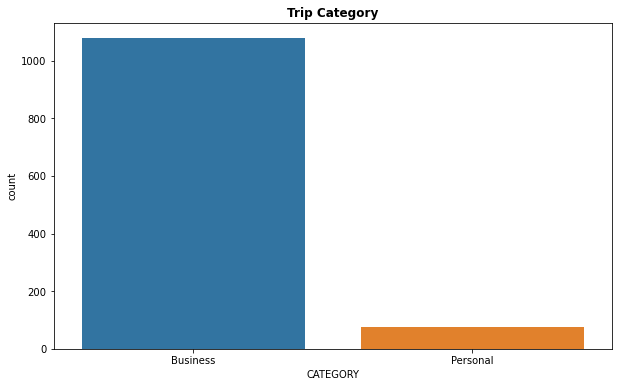

In [20]:
plt.figure(figsize=(10, 6)) 
sns . countplot(x= 'CATEGORY' ,data=df)
plt.title('Trip Category', fontweight='bold')
plt.show()

##### **Purpose**
-  Meetings were the most frequent reason for using Uber in 2016. This suggests the user relied heavily on Uber to get to and from meetings.

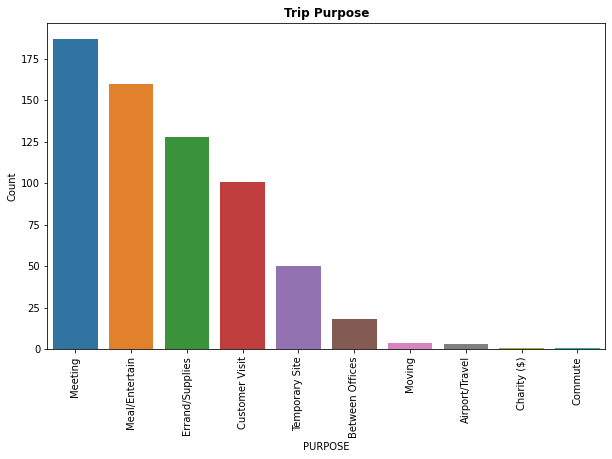

In [21]:
plt.figure(figsize=(10, 6))  # Adjust the width and height 
sns.countplot(x='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index)
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Count') 
plt.title('Trip Purpose', fontweight='bold')
plt.show()

---

#### **Visualize Mean Miles**

##### **Miles**
-   Most trips were on the shorter side compared to longer distances.

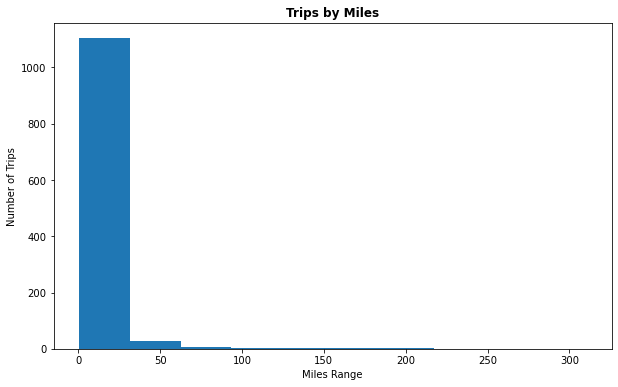

In [22]:
plt.figure(figsize=(10, 6))  
df['MILES'].plot.hist()
plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")
plt.title("Trips by Miles", fontweight='bold')  # Making the title bold
plt.show()

##### **Mean Miles**
-     The data shows that "commute" trips have the highest average distance (mean miles) compared to other trip purposes.This suggests the user might have relied on Uber for longer commutes to and from work.

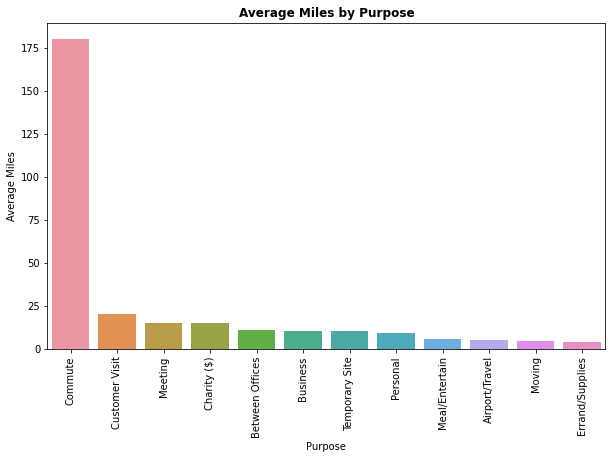

In [23]:
# Calculate mean miles for each purpose
means = {
    'Business': round(df[df['CATEGORY'] == 'Business'].MILES.mean(), 2),
    'Personal': round(df[df['CATEGORY'] == 'Personal'].MILES.mean(), 2),
    'Meal/Entertain': round(df[df['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 2),
    'Errand/Supplies': round(df[df['PURPOSE'] == 'Errand/Supplies'].MILES.mean(), 2),
    'Meeting': round(df[df['PURPOSE'] == 'Meeting'].MILES.mean(), 2),
    'Customer Visit': round(df[df['PURPOSE'] == 'Customer Visit'].MILES.mean(), 2),
    'Temporary Site': round(df[df['PURPOSE'] == 'Temporary Site'].MILES.mean(), 2),
    'Between Offices': round(df[df['PURPOSE'] == 'Between Offices'].MILES.mean(), 2),
    'Charity ($)': round(df[df['PURPOSE'] == 'Charity ($)'].MILES.mean(), 2),
    'Commute': round(df[df['PURPOSE'] == 'Commute'].MILES.mean(), 2),
    'Moving': round(df[df['PURPOSE'] == 'Moving'].MILES.mean(), 2),
    'Airport/Travel': round(df[df['PURPOSE'] == 'Airport/Travel'].MILES.mean(), 2)
}

# Convert dictionary to DataFrame
means_df = pd.DataFrame(list(means.items()), columns=['Purpose', 'Average Miles'])

# Sort DataFrame by average miles
means_df = means_df.sort_values(by='Average Miles', ascending=False)

# Plot the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Purpose', y='Average Miles', data=means_df, order=means_df['Purpose'])
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles by Purpose', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

---

#### **Visualize Trip Pickup and Drop-Off**

##### **Pickup Trips**
-    Cary recorded the most Uber pickups compared to other locations! This suggests Cary was a frequent starting point for the user's Uber rides.

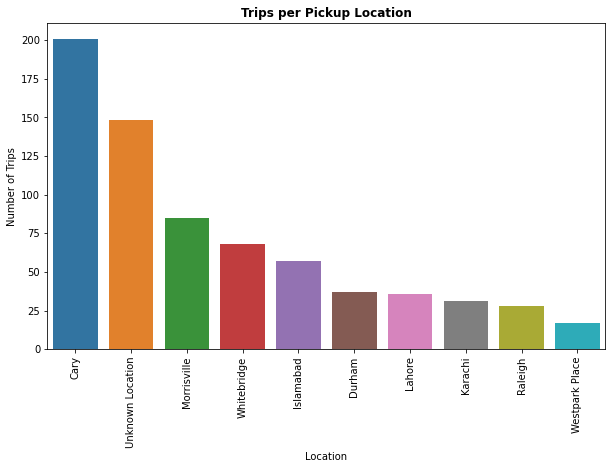

In [24]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(x='START', data=df, order=df['START'].value_counts().nlargest(10).index)
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Number of Trips') 
plt.xlabel('Location')
plt.title('Trips per Pickup Location', fontweight='bold')
plt.show()

##### **Dropoff Trips**
-    The data shows Cary holds the top spot for both Uber pickups and drop-offs. This suggests Cary was a central location in the user's travel patterns - they frequently started and ended their rides there.

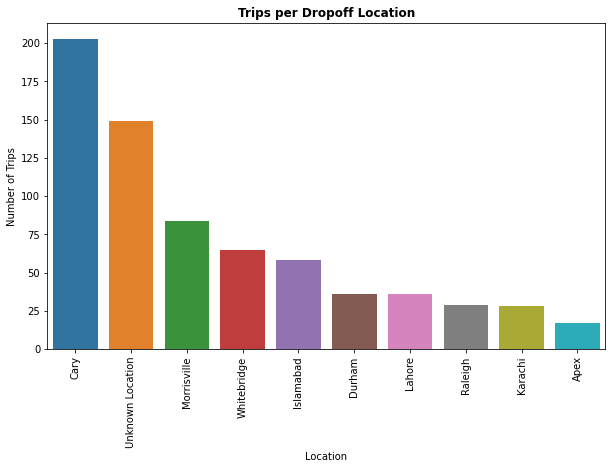

In [25]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.countplot(x='STOP', data=df, order=df['STOP'].value_counts().nlargest(10).index)
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Number of Trips') 
plt.xlabel('Location')
plt.title('Trips per Dropoff Location', fontweight='bold')
plt.show()

---

#### **Visualize Trip Frequency**

##### **Trip Frequency**
-    The analysis reveals a fascinating pattern: the user frequently takes Uber trips between Morrisville and Cary! This suggests these two locations played a significant role in the user's travel habits.

Text(0.5, 1.0, 'Frequency of Trips')

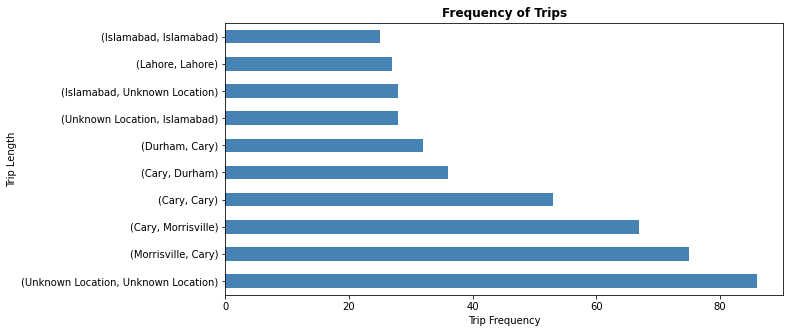

In [26]:
#Frequency of Trips from Location A to B
a_b = df[[ 'START', 'STOP'] ].value_counts().nlargest(10)
a_b.plot(kind='barh', color= 'steelblue', figsize=(10, 5))
plt.xlabel('Trip Frequency')
plt.ylabel('Trip Length' )
plt.title( 'Frequency of Trips', fontweight = 'bold')

---

#### **Visualize Trips by Category and Purpose**

##### **Meeting Trips per Day**
-    The data analysis unearthed a fascinating trend: Fridays saw the most meeting trips via Uber! This suggests that the user likely had a busy meeting schedule, particularly concentrated on Fridays.

Text(0.5, 1.0, 'Meeting Trips by Day')

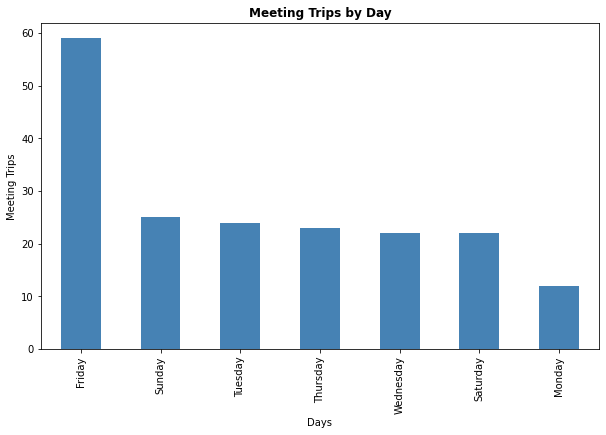

In [27]:
meet = df[ 'WEEKDAY' ][df['PURPOSE']=='Meeting'].value_counts()
meet.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Meeting Trips' )
plt.title( 'Meeting Trips by Day', fontweight = 'bold')

##### **Meeting Trips by Month**
-     The analysis reveals an interesting trend: December saw the most meeting trips compared to other months! This suggests the user might have had a particularly busy meeting schedule at the end of the year. 

Text(0.5, 1.0, 'Meeting Trips by Month')

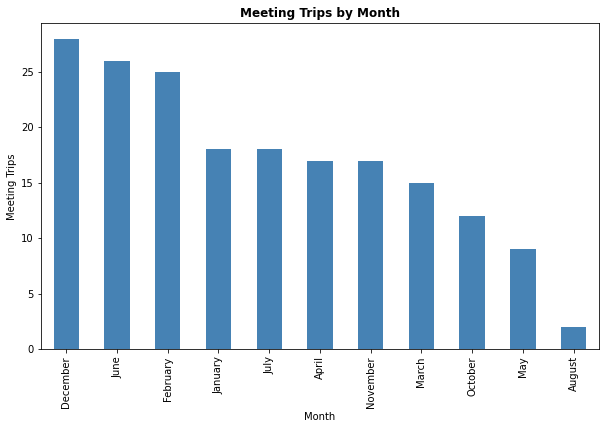

In [28]:
meet1 = df[ 'MONTHS' ][df['PURPOSE']=='Meeting'].value_counts()
meet1.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Month')
plt.ylabel('Meeting Trips' )
plt.title( 'Meeting Trips by Month', fontweight = 'bold')

##### **Meal/Entertain Trips by Day**
-     The data analysis reveals a surprising trend: Mondays saw the most meal/entertainment trips via Uber compared to other days of the week. This is counterintuitive as weekends might typically be associated with such outings. Perhaps these Monday trips were business lunches or dinners to kick off the work week.

Text(0.5, 1.0, 'Meal/Entertain Trips by Day')

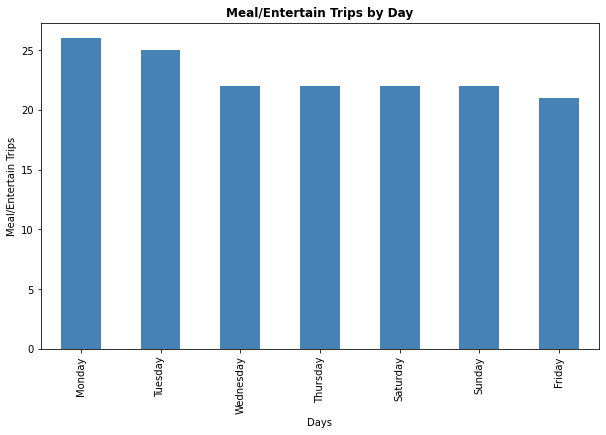

In [29]:
me = df[ 'WEEKDAY' ][df['PURPOSE']=='Meal/Entertain'].value_counts()
me.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Meal/Entertain Trips' )
plt.title( 'Meal/Entertain Trips by Day', fontweight = 'bold')

##### **Meal/Entertain Trips by Month**
-     The data analysis reveals an interesting trend: March saw the most meal/entertainment trips compared to other months! This suggests the user might have had a particularly active social life or busy dining schedule in March. 

Text(0.5, 1.0, 'Meal/Entertain Trips by Month')

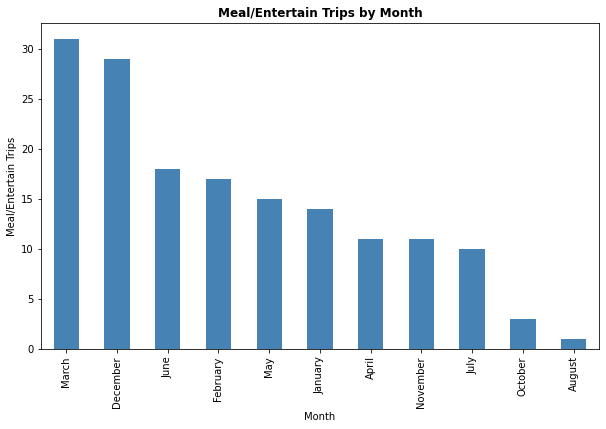

In [30]:
me1 = df[ 'MONTHS' ][df['PURPOSE']=='Meal/Entertain'].value_counts()
me1.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Month')
plt.ylabel('Meal/Entertain Trips' )
plt.title( 'Meal/Entertain Trips by Month', fontweight = 'bold')

##### **Errand/Supplies Trips by Day**
-     The data analysis reveals an interesting trend: Tuesdays saw the most errand/supply trips compared to other days of the week. This suggests Tuesdays might have been a designated day for the user to tackle errands and restock on supplies. 

Text(0.5, 1.0, 'Errand/Supplies Trips by Day')

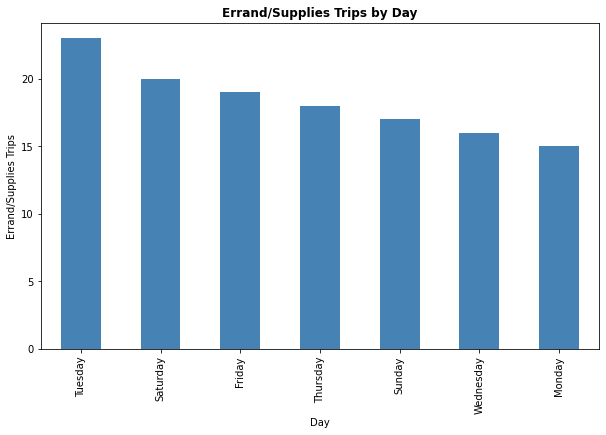

In [31]:
es = df[ 'WEEKDAY' ][df['PURPOSE']=='Errand/Supplies'].value_counts()
es.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Day')
plt.ylabel('Errand/Supplies Trips' )
plt.title( 'Errand/Supplies Trips by Day', fontweight = 'bold')

##### **Errand/Supply Trips by Month**
-     The data analysis reveals a fascinating trend: December saw the most errand/supply trips compared to other months! This is quite interesting, as the holiday season can be a busy time for shopping and errands, but it also might disrupt typical routines. 

Text(0.5, 1.0, 'Errand/Supplies Trips by Month')

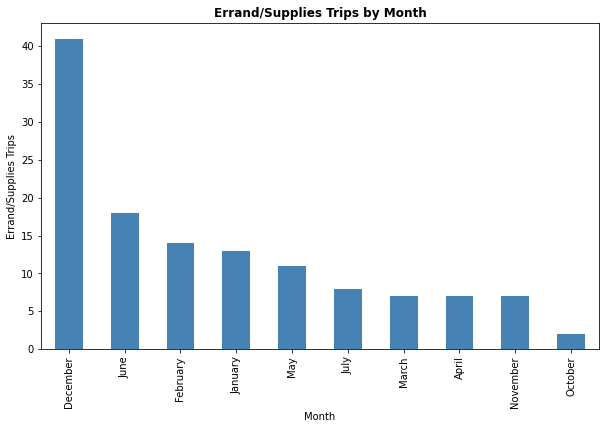

In [32]:
es1 = df[ 'MONTHS' ][df['PURPOSE']=='Errand/Supplies'].value_counts()
es1.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Month')
plt.ylabel('Errand/Supplies Trips' )
plt.title( 'Errand/Supplies Trips by Month', fontweight = 'bold')

##### **Airport/Travel Trips by Day**
-     The data analysis reveals a logical trend: weekends see the most airport/travel trips compared to weekdays. This suggests the user likely utilized Uber for transportation to and from airports for travel during weekends.

Text(0.5, 1.0, 'Airport/Travel Trips by Day')

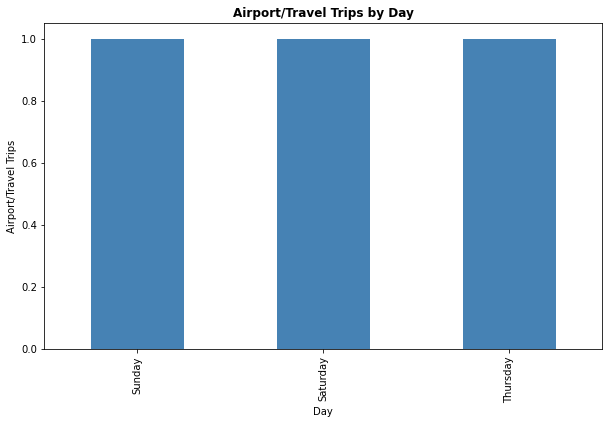

In [33]:
at = df[ 'WEEKDAY' ][df['PURPOSE']=='Airport/Travel'].value_counts()
at.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Day')
plt.ylabel('Airport/Travel Trips' )
plt.title( 'Airport/Travel Trips by Day', fontweight = 'bold')

##### **Airport/Travel Trips by Month**
-     The data analysis reveals an interesting trend: December saw the most airport/travel trips compared to other months! This could be due to several reasons related to the holiday season.

Text(0.5, 1.0, 'Airport/Travel Trips by Month')

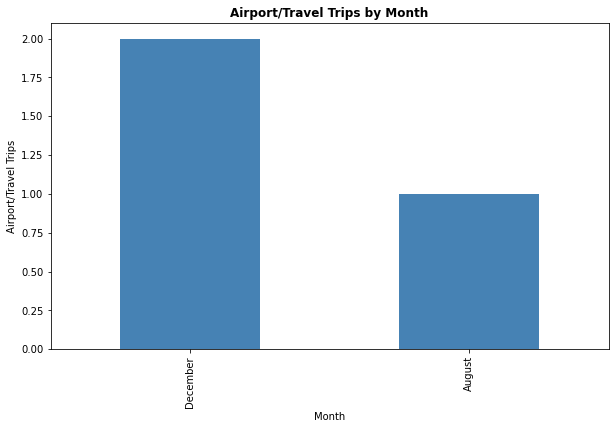

In [34]:
at1 = df[ 'MONTHS' ][df['PURPOSE']=='Airport/Travel'].value_counts()
at1.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Month')
plt.ylabel('Airport/Travel Trips' )
plt.title( 'Airport/Travel Trips by Month', fontweight = 'bold')

##### **Customer Visit Trips by Day**
-     The data analysis reveals an interesting trend: Mondays saw the most customer visit trips compared to other days of the week. This suggests the user's work schedule might involve frequent client visits at the beginning of the week.

Text(0.5, 1.0, 'Customer Visit Trips by Day')

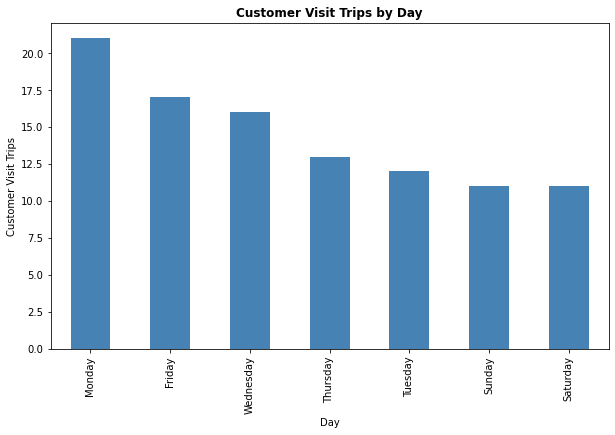

In [35]:
cv = df[ 'WEEKDAY' ][df['PURPOSE']=='Customer Visit'].value_counts()
cv.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Day')
plt.ylabel('Customer Visit Trips' )
plt.title( 'Customer Visit Trips by Day', fontweight = 'bold')

##### **Customer Visit Trips by Month**
-     The data analysis reveals an interesting trend: December saw the most customer visit trips compared to other months. This is a curious finding, as December is often a busy month with holidays and potentially less focus on work activities. Could these December visits be for client performance reviews, project planning for the coming year, or finalizing contracts before the year-end? Exploring the context of the visits might be insightful.

Text(0.5, 1.0, 'Customer Visit Trips by Month')

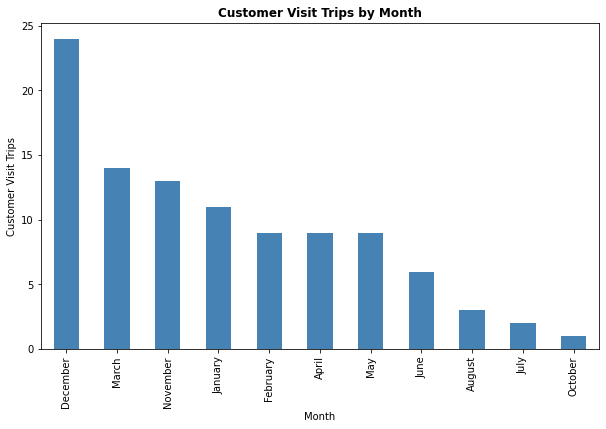

In [36]:
cv1 = df[ 'MONTHS' ][df['PURPOSE']=='Customer Visit'].value_counts()
cv1.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Month')
plt.ylabel('Customer Visit Trips' )
plt.title( 'Customer Visit Trips by Month', fontweight = 'bold')

##### **Between Offices Trips by Day**
-     The data analysis reveals an interesting trend: Mondays saw the most "between offices" trips compared to other days of the week. This suggests the user might have a regular schedule for traveling between office locations, potentially kicking things off at the beginning of the workweek.

Text(0.5, 1.0, 'Between Offices Trips by Day')

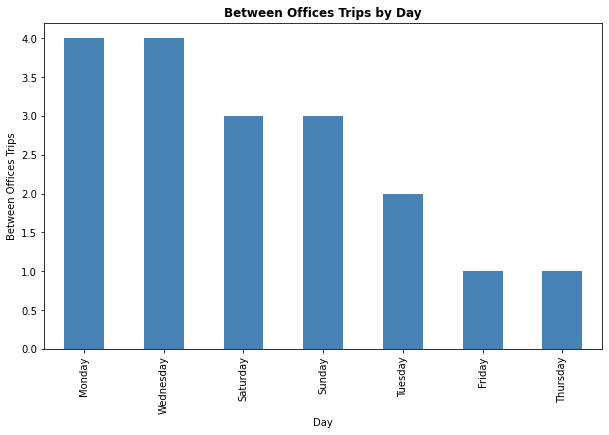

In [37]:
bo = df[ 'WEEKDAY' ][df['PURPOSE']=='Between Offices'].value_counts()
bo.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Day')
plt.ylabel('Between Offices Trips' )
plt.title( 'Between Offices Trips by Day', fontweight = 'bold')

##### **Between Offices Trips by Month**
-     The analysis unearthed an interesting trend: November saw the most "between-office" trips compared to other months. This is a unique finding, as most business travel might be expected to be concentrated around the start or end of the quarter (i.e., January, April, July, October) or during specific project phases. Were there any company-wide events, training sessions, or project milestones in November that necessitated travel between offices?  Could there have been a specific project or department requiring planning or coordination between offices in preparation for the December year-end? Was there a new office space opened in November that required additional travel or coordination between locations during the initial phase? Did the company onboard new employees in November who might have required visits to different office locations for training or introductions?

Text(0.5, 1.0, 'Between Offices Trips by Month')

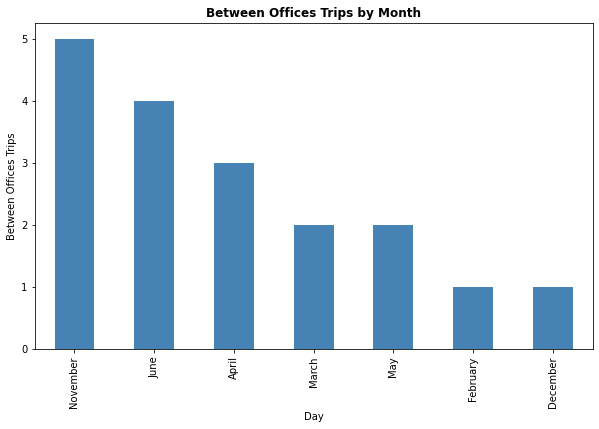

In [38]:
bo1 = df[ 'MONTHS' ][df['PURPOSE']=='Between Offices'].value_counts()
bo1.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Day')
plt.ylabel('Between Offices Trips' )
plt.title( 'Between Offices Trips by Month', fontweight = 'bold')

---

#### **Visualize Daily Trips per Month**

##### **January**
-     The data analysis reveals a fascinating detail: January 29th had the highest number of trips compared to other days in January. 

Text(0.5, 1.0, 'Number of Trips in January')

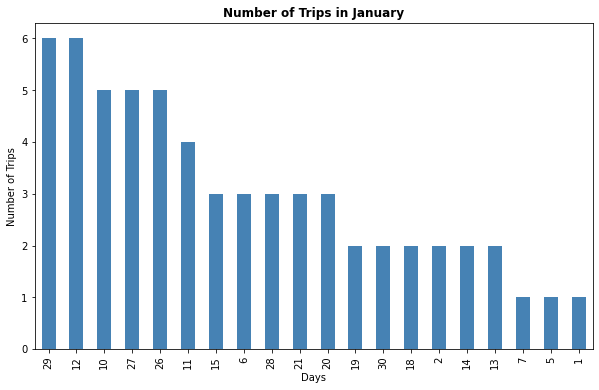

In [39]:
#January
jan = df[ 'DAY' ][df['MONTHS']=='January'].value_counts()
jan.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in January', fontweight = 'bold')

##### **February**
-    The data analysis reveals a fascinating detail: February 21st had the highest number of trips compared to other days in February. 

Text(0.5, 1.0, 'Number of Trips in Febuary')

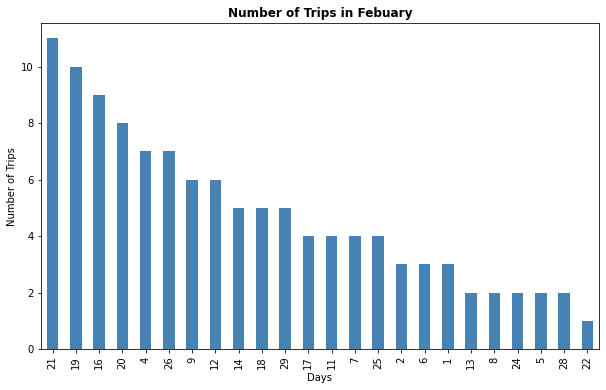

In [40]:
#February
feb = df[ 'DAY' ][df['MONTHS']=='February'].value_counts()
feb.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in Febuary', fontweight = 'bold')

##### **March**
-     The data analysis reveals a fascinating detail: March 4th had the highest number of trips compared to other days in March. 

Text(0.5, 1.0, 'Number of Trips in March')

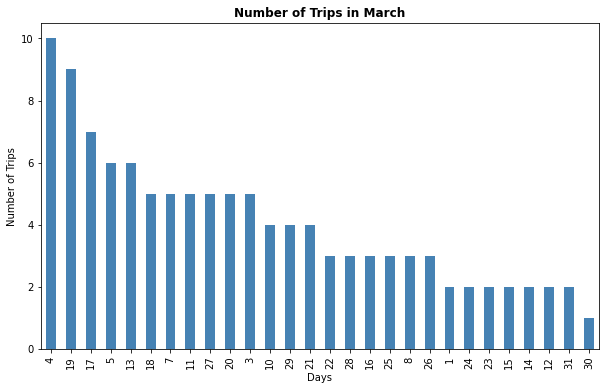

In [41]:
#March
mar = df[ 'DAY' ][df['MONTHS']=='March'].value_counts()
mar.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in March', fontweight = 'bold')

##### **April**
-     The data analysis reveals a fascinating detail: April 2nd had the highest number of trips compared to other days in April. 

Text(0.5, 1.0, 'Number of Trips in April')

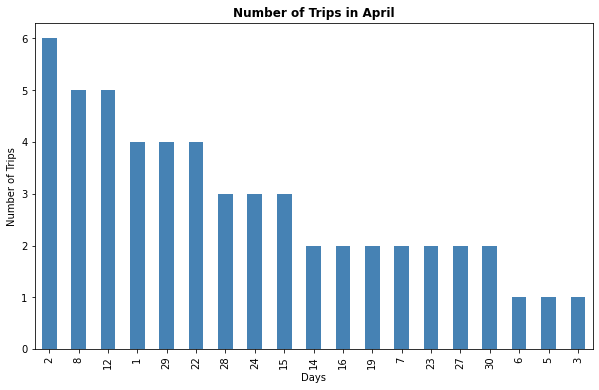

In [42]:
#April
apr = df[ 'DAY' ][df['MONTHS']=='April'].value_counts()
apr.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in April', fontweight = 'bold')

##### **May**
-     The data analysis reveals a fascinating detail: May 1st had the highest number of trips compared to other days in May. 

Text(0.5, 1.0, 'Number of Trips in May')

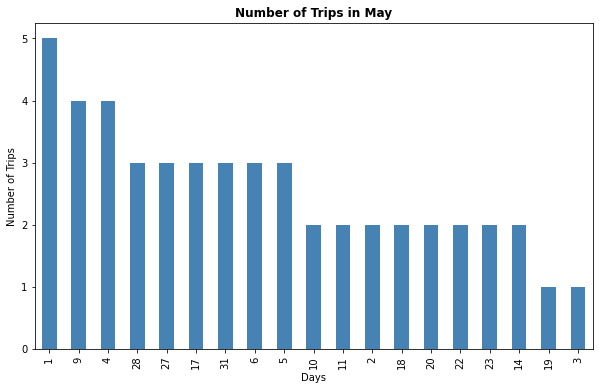

In [43]:
#May
may = df[ 'DAY' ][df['MONTHS']=='May'].value_counts()
may.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in May', fontweight = 'bold')

##### **June**
-     The data analysis reveals that June 27th saw the highest number of trips compared to other days in June.

Text(0.5, 1.0, 'Number of Trips in June')

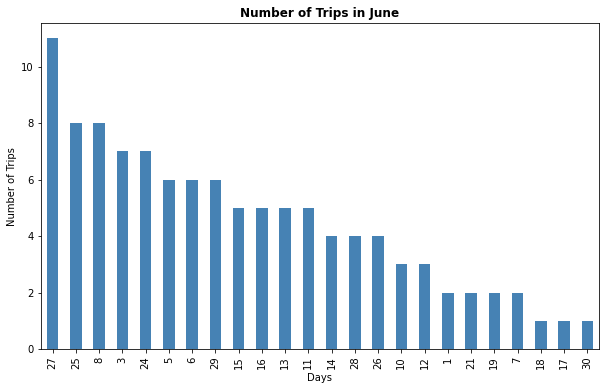

In [44]:
#June
jun = df[ 'DAY' ][df['MONTHS']=='June'].value_counts()
jun.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in June', fontweight = 'bold')

##### **July**
-      The data analysis reveals that July 18th saw the highest number of trips compared to other days in July.

Text(0.5, 1.0, 'Number of Trips in July')

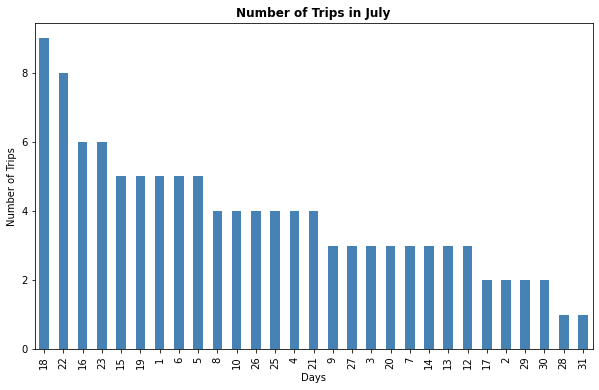

In [45]:
#July
jul = df[ 'DAY' ][df['MONTHS']=='July'].value_counts()
jul.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in July', fontweight = 'bold')

##### **August**
-     The data analysis reveals that August 26th saw the highest number of trips compared to other days in August.

Text(0.5, 1.0, 'Number of Trips in August')

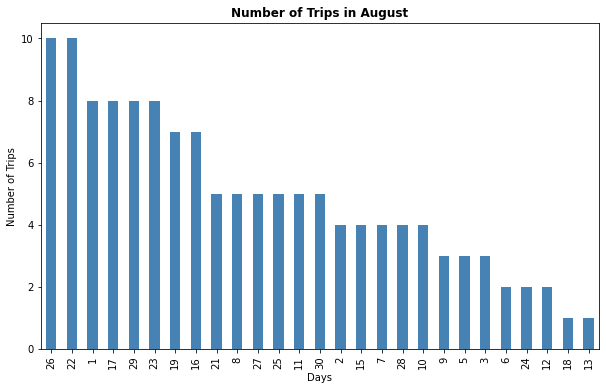

In [46]:
#August
aug = df[ 'DAY' ][df['MONTHS']=='August'].value_counts()
aug.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in August', fontweight = 'bold')

##### **September**
-     The data analysis reveals that September 19th saw the highest number of trips compared to other days in September. 

Text(0.5, 1.0, 'Number of Trips in September')

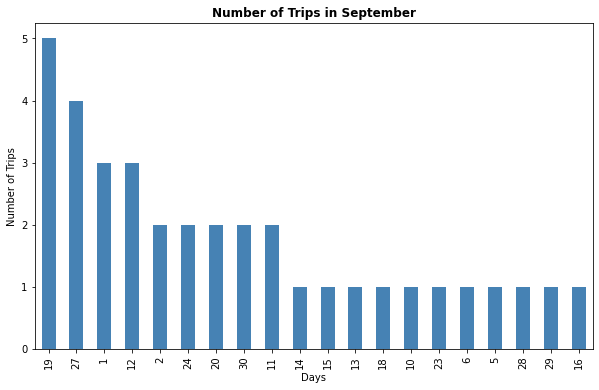

In [47]:
#September
sep = df[ 'DAY' ][df['MONTHS']=='September'].value_counts()
sep.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in September', fontweight = 'bold')

##### **October**
-     The data reveals October 30th had the highest number of trips. The end of the month can sometimes be busy for people catching up on errands, work deadlines, or social gatherings before the new month begins. 

Text(0.5, 1.0, 'Number of Trips in October')

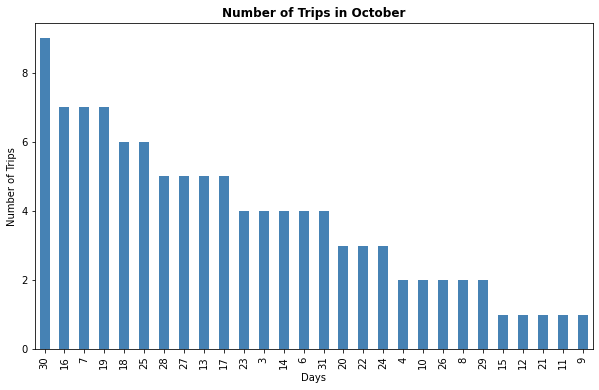

In [48]:
octo = df[ 'DAY' ][df['MONTHS']=='October'].value_counts()
octo.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in October', fontweight = 'bold')

##### **November**
-     The data reveals an intriguing fact: The 13th in November had the most trips compared to other days in that month.

Text(0.5, 1.0, 'Number of Trips in November')

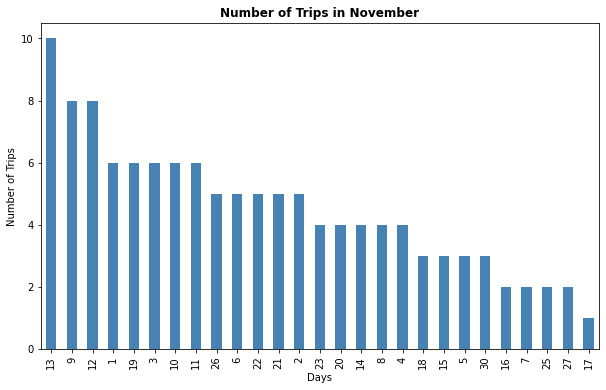

In [49]:
nov = df[ 'DAY' ][df['MONTHS']=='November'].value_counts()
nov.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in November', fontweight = 'bold')

##### **December**
-     The data analysis reveals a fascinating detail: December 29th saw the highest number of trips compared to other days in December. This suggests a surge in Uber usage on this specific day within the already busy December month. 

Text(0.5, 1.0, 'Number of Trips in December')

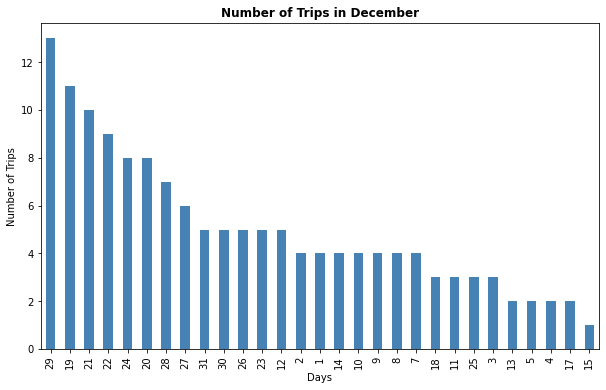

In [50]:
dec = df[ 'DAY' ][df['MONTHS']=='December'].value_counts()
dec.plot(kind='bar', color= 'steelblue', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Trips in December', fontweight = 'bold')

---

##### **Data Source**
-     Zeeshan-ul-hassan Usmani, My Uber Drives Dataset, Kaggle Dataset Repository, March 23, 2017
-     https://www.kaggle.com/datasets/zusmani/uberdrives

---

# **END**